# Notes/Questions to discuss:
1.	I removed 59 SPI companies without Total ESG Score, 1 duplicate company (Schindler, see 1.4), and 4 S&P 500 companies without Total ESG Score **(see section 1.3.1)**.</br>
    *Remark Marisa: Makes sense*
2.	**To discuss:** Should we remove SPI companies whose Country is not Switzerland? (There are 5 with ESG scores.) Should we remove a few S&P companies whose country is not US? **(See 1.3.2)**</br>
    *Remark Marisa: I would remove non swiss companies from SPI. Also only take US companies from S&P 500 because 96% are from the US. I added code to show this so we can argue properly*
3.	I removed financial indicators due to a large amount of missing data: PE_Ratio, EBITDA_Margin_%, Debt_to_Equity, Current_Ratio, and Operating_Cash_Flow **(see 1.3.5)**.</br>
    *Remark Marisa: Makes sense to me.*
4.	Depending on the metrics and industries chosen for further analysis, we may need to remove additional S&P 500 data due to the unbalanced size of the two datasets and missing values. However, the S&P 500 dataset is mainly used for support and comparison, so we do not perform a deep analysis on it and adjust it according to the SPI dataset **(see 1.3.5)**. </br>
    *Remark Marisa: Fine for me for now. But I will keep it in mind for further analysis*
5.	Outliers should be addressed (keep or remove) during the analysis and comparison of specific metrics based on their observed distributions **(see 4.3)**. </br>
    *Remark Marisa: Same as above. I would keep these for now and think about removing them when we analyse them for our research questions.*
6.	The merged and cleaned dataset is saved as `cleaned_combined_data.csv` in the Data folder. Additional columns have been added:
    - Company_Type to identify SPI vs S&P 500 companies
    - ESG Risk Classification according to the ESG Risk Ratings Methodology **(see 5.2)**

# 1 Data Loading & Cleansing

## 1.1  Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from pathlib import Path

## 1.2  Load Data

Firstly, we load the tickers which were originally downloaded from wikipedia and checked with ...

In [2]:
spi = pd.read_csv(Path("Data/esg_financial_analysis_spi.csv"))
sp500 = pd.read_csv(Path("Data/esg_financial_analysis_sp500.csv"))

Then we check the structure of the SPI dataset. I contains 201 observations with 34 variables.
On the first glance, we see that we don't have all variables of all observations. We therefore need to look into that closer.
(i.e. 142 Total ESG Scores out of 201 observations)

In [3]:
# SPI dataset overview
print(spi.shape)
spi.describe()

(201, 34)


,Total_ESG_Score,Environmental_Score,Social_Score,Governance_Score,Highest_Controversy,Stock_Price,Current_Price,Market_Cap,PE_Ratio,PB_Ratio,...,ROE_Pct,ROA_Pct,Profit_Margin_Pct,EBITDA_Margin_Pct,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_Pct
count,142.000000,71.000000,71.000000,71.000000,141.000000,196.000000,199.000000,1.990000e+02,150.000000,198.000000,...,186.000000,190.000000,194.000000,162.000000,194.000000,189.000000,158.000000,170.000000,1.770000e+02,196.000000
mean,22.166127,5.776479,8.240423,5.491690,0.574468,834.992959,1017.642378,9.678245e+09,29.586800,3.581717,...,4.347473,2.742158,41.736392,-56.286296,475.215722,0.664238,114.213291,7.071059,8.240547e+08,19.177653
std,7.795570,4.963638,3.330291,2.194745,0.880211,6992.709729,9313.699001,2.940864e+10,40.782032,13.400904,...,44.542110,7.851904,290.066171,696.720688,6191.892435,0.469562,301.059794,58.167139,2.949556e+09,220.548477
min,8.560000,0.000000,0.640000,1.070000,0.000000,0.050000,0.021000,1.046500e+05,0.040000,-51.520000,...,-288.140000,-27.200000,-133.720000,-8713.510000,-28.810000,-0.464000,0.280000,0.020000,-4.749700e+09,-100.000000
25%,15.647500,1.735000,5.755000,4.235000,0.000000,25.152500,23.275000,3.087133e+08,13.937500,0.865000,...,2.012500,0.632500,1.062500,5.557500,0.257500,0.299000,21.365000,1.022500,1.764100e+07,-4.537500
50%,22.320000,3.920000,8.790000,5.010000,0.000000,77.185000,80.200000,1.277350e+09,19.425000,1.675000,...,8.285000,2.225000,8.055000,12.760000,4.020000,0.664000,56.305000,1.505000,8.063400e+07,1.180000
75%,27.620000,9.985000,10.495000,6.795000,1.000000,220.257500,223.500000,4.349876e+09,30.932500,3.747500,...,15.940000,6.605000,21.027500,23.687500,9.702500,0.964000,109.325000,2.387500,4.170490e+08,7.077500
max,49.050000,17.020000,16.750000,10.960000,4.000000,97134.130000,130600.000000,2.250000e+11,443.330000,172.410000,...,163.700000,50.970000,3663.790000,116.370000,86227.180000,2.164000,3322.760000,758.290000,2.078800e+10,3028.010000


We do the same for the S&P 500 dataset. It contains 503 observations with 34 variables.
Here we see as well that we have some NAs for certain variables.

In [4]:
# S&P 500 dataset overview
print(sp500.shape)
sp500.describe()

(503, 34)


,Total_ESG_Score,Environmental_Score,Social_Score,Governance_Score,Highest_Controversy,Stock_Price,Current_Price,Market_Cap,PE_Ratio,PB_Ratio,...,ROE_Pct,ROA_Pct,Profit_Margin_Pct,EBITDA_Margin_Pct,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_Pct
count,300.000000,299.000000,299.000000,299.000000,300.000000,303.000000,303.000000,3.030000e+02,288.000000,303.000000,...,283.000000,299.000000,303.000000,282.000000,303.000000,300.000000,264.000000,283.000000,2.890000e+02,302.000000
mean,20.164533,6.871003,8.532174,4.794582,1.930000,189.875446,202.044719,1.521832e+11,38.558889,-3.138020,...,27.100919,6.966120,14.526073,28.319433,7.003432,0.981867,137.596364,1.751272,6.891888e+09,5.838278
std,6.717920,5.474978,3.392135,2.299318,0.752987,339.840025,343.964816,4.808831e+11,74.027724,127.439643,...,51.741107,5.957017,13.684727,16.779211,10.369405,0.428993,202.053465,3.759739,1.667697e+10,14.167928
min,7.120000,0.040000,0.890000,1.430000,0.000000,9.170000,8.140000,6.908318e+09,4.850000,-2181.440000,...,-183.280000,-3.730000,-71.710000,-9.300000,-16.550000,0.023000,0.050000,0.040000,-1.076700e+10,-45.710000
25%,15.102500,2.255000,6.225000,3.380000,2.000000,57.130000,62.100000,2.035670e+10,17.295000,1.600000,...,9.105000,3.205000,7.495000,16.960000,2.245000,0.669500,46.792500,0.875000,1.256918e+09,-0.155000
50%,19.630000,5.690000,8.610000,4.360000,2.000000,109.290000,122.870000,3.940400e+10,24.215000,3.060000,...,15.200000,5.400000,13.630000,24.995000,4.860000,0.998500,74.615000,1.220000,2.617000e+09,4.255000
75%,23.932500,10.775000,10.625000,5.490000,2.000000,224.685000,238.605000,1.075000e+11,34.490000,6.865000,...,29.045000,8.660000,20.550000,37.205000,9.270000,1.230250,155.700000,1.775000,5.611000e+09,9.955000
max,41.260000,24.790000,17.760000,20.210000,5.000000,4845.740000,4952.310000,4.430000e+12,755.640000,175.810000,...,514.460000,53.090000,72.960000,92.610000,143.620000,2.686000,2149.330000,60.310000,1.360000e+11,114.200000


## 1.3 Data cleansing

*Remark MT: cant we remove this first step because we handle it in more detail later?* </br>
We now look into more detail of missing data: We look at the count and the percentage of the amount of data missing. </br>
Especially for the ESG, we see some missing data which we need to look into closer.

In [5]:
def missing_summary(df, name):
    missing_count = df.isnull().sum()
    missing_pct = (missing_count / len(df) * 100).round(2)
    return pd.DataFrame({
        "Dataset": name,
        "Missing Count": missing_count,
        "Missing %": missing_pct
    })

In [6]:
missing_summary(spi, "SPI")

,Dataset,Missing Count,Missing %
Ticker,SPI,0,0.00
Company_Name,SPI,3,1.49
Currency,SPI,2,1.00
Data_Date,SPI,1,0.50
Industry,SPI,7,3.48
Sector,SPI,7,3.48
Country,SPI,7,3.48
Total_ESG_Score,SPI,59,29.35
Environmental_Score,SPI,130,64.68
Social_Score,SPI,130,64.68


In [7]:
missing_summary(sp500, "SP500")

,Dataset,Missing Count,Missing %
Ticker,SP500,0,0.00
Company_Name,SP500,200,39.76
Currency,SP500,200,39.76
Data_Date,SP500,200,39.76
Industry,SP500,200,39.76
Sector,SP500,200,39.76
Country,SP500,200,39.76
Total_ESG_Score,SP500,203,40.36
Environmental_Score,SP500,204,40.56
Social_Score,SP500,204,40.56


### 1.3.1 Missing ESG data

In [8]:
def check_esg_missing(df, name):
    """Check proportion of missing ESG scores"""
    esg_columns = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score', 'ESG_Performance', 'Highest_Controversy']
    esg_scores_columns = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score']
    
    print(f"\n{name} - ESG Data Availability:")
    for col in esg_columns:
        if col in df.columns:
            missing_count = df[col].isnull().sum()
            missing_pct = (missing_count / len(df) * 100)
            print(f"  {col}: {missing_count}/{len(df)} missing ({missing_pct:.2f}%)")
    
    # Overall ESG availability
    has_total_esg = df[['Total_ESG_Score']].notnull().all(axis=1)
    has_all_esg_scores = df[esg_scores_columns].notnull().all(axis=1)
    has_all_esg_data = df[esg_columns].notnull().all(axis=1)
    companies_with_total_esg = has_total_esg.sum()
    companies_without_total_esg = len(df) - companies_with_total_esg
    companies_with_all_esg_scores = has_all_esg_scores.sum()
    companies_with_all_esg_data = has_all_esg_data.sum()
    
    print(f"\n  Companies WITHOUT Total ESG scores: {companies_without_total_esg} ({companies_without_total_esg/len(df)*100:.2f}%)")
    print(f"  Companies WITH Total ESG score: {companies_with_total_esg} ({companies_with_total_esg/len(df)*100:.2f}%)")
    print(f"  Companies WITH all ESG scores: {companies_with_all_esg_scores} ({companies_with_all_esg_scores/len(df)*100:.2f}%)")
    print(f"  Companies WITH all ESG data: {companies_with_all_esg_data} ({companies_with_all_esg_data/len(df)*100:.2f}%)")

spi_no_esg = check_esg_missing(spi, "SPI")
sp500_no_esg = check_esg_missing(sp500, "S&P 500")


SPI - ESG Data Availability:
  Total_ESG_Score: 59/201 missing (29.35%)
  Environmental_Score: 130/201 missing (64.68%)
  Social_Score: 130/201 missing (64.68%)
  Governance_Score: 130/201 missing (64.68%)
  ESG_Performance: 59/201 missing (29.35%)
  Highest_Controversy: 60/201 missing (29.85%)

  Companies WITHOUT Total ESG scores: 59 (29.35%)
  Companies WITH Total ESG score: 142 (70.65%)
  Companies WITH all ESG scores: 71 (35.32%)
  Companies WITH all ESG data: 71 (35.32%)

S&P 500 - ESG Data Availability:
  Total_ESG_Score: 203/503 missing (40.36%)
  Environmental_Score: 204/503 missing (40.56%)
  Social_Score: 204/503 missing (40.56%)
  Governance_Score: 204/503 missing (40.56%)
  ESG_Performance: 203/503 missing (40.36%)
  Highest_Controversy: 203/503 missing (40.36%)

  Companies WITHOUT Total ESG scores: 203 (40.36%)
  Companies WITH Total ESG score: 300 (59.64%)
  Companies WITH all ESG scores: 299 (59.44%)
  Companies WITH all ESG data: 299 (59.44%)


Summary: 

Missing ESG data in the S&P 500 dataset is negligible, but in SPI dataset, only 71/201 companies have full ESG data, and 142 have Total ESG Score as well as ESG_Performance indicator. Removing the 130 companies without detailed scores would be too much, instead, we could remove 59/201 SPI companies without the Total ESG Score, and consider dividing the remaining companies into two subgroups for further analysis: 
- 142 companies with Total ESG Score 
- and 71 with full ESG data

In [9]:
spi_esg = spi.dropna(subset=['Total_ESG_Score'])
print(spi_esg.shape)
print(spi_esg['Total_ESG_Score'].isnull().sum())

(142, 34)
0


In [10]:
sp500_esg = sp500.dropna(subset=['Total_ESG_Score'])
print(sp500_esg.shape)
print(sp500_esg['Total_ESG_Score'].isnull().sum())

(300, 34)
0


### 1.3.2 Country Issues

Next, we look at the headquarters of the companies because...

In [11]:
non_swiss = spi_esg[spi_esg["Country"] != "Switzerland"]
print(non_swiss[['Ticker', 'Company_Name', 'Country', 'Total_ESG_Score']].to_string())

      Ticker                                      Company_Name        Country  Total_ESG_Score
21    AMS.SW                                      ams-OSRAM AG        Austria            17.61
44   COPN.SW                        Cosmo Pharmaceuticals N.V.        Ireland            29.37
124  LLBN.SW  Liechtensteinische Landesbank Aktiengesellschaft  Liechtenstein            28.14
156  VPBN.SW                                        VP Bank AG  Liechtenstein            28.06
170  PKTM.SW                                PIERER Mobility AG        Austria             8.88


TODO: Consider if we should remove these non-swiss companies from SPI dataset

Next, we check if companies in the SPI are also in the S&P 500. ???

In [12]:
sp500_swiss = sp500_esg[sp500_esg["Country"] == "Switzerland"]
print(sp500_swiss[['Ticker', 'Company_Name', 'Country', 'Total_ESG_Score']].to_string())

    Ticker   Company_Name      Country  Total_ESG_Score
23    AMCR      Amcor plc  Switzerland            14.31
41    APTV      Aptiv PLC  Switzerland            12.89
101     CB  Chubb Limited  Switzerland            20.12
206   GRMN    Garmin Ltd.  Switzerland            21.23


In [13]:
check_duplicates = sp500_esg['Company_Name'].tolist()
matching_spi = spi_esg[spi_esg['Company_Name'].isin(check_duplicates)]

print(matching_spi[['Ticker', 'Company_Name', 'Country', 'Total_ESG_Score']].to_string())

Empty DataFrame
Columns: [Ticker, Company_Name, Country, Total_ESG_Score]
Index: []


So: No overlapping companies

We want to see the distribution of countries in the S&P dataset. Because approx 96% of the companies are based in the US, we decide to focus on Swiss vs. US companies.

In [14]:
country_counts = sp500_esg['Country'].value_counts(dropna=False)
country_pct = (country_counts / len(sp500_esg) * 100).round(2)

country_summary = pd.DataFrame({
    'Count': country_counts,
    'Percentage (%)': country_pct
})

print("S&P 500 — Country distribution:")
display(country_summary)

S&P 500 — Country distribution:


,Count,Percentage (%)
Country,,
United States,280,93.33
Ireland,9,3.00
Switzerland,4,1.33
United Kingdom,3,1.00
Bermuda,1,0.33
Canada,1,0.33
Netherlands,1,0.33
Singapore,1,0.33


In [15]:
sp500_nonUS = sp500_esg[sp500_esg["Country"] != "United States"]
print(sp500_nonUS[['Ticker', 'Company_Name', 'Country', 'Total_ESG_Score']].to_string())

    Ticker                                 Company_Name         Country  Total_ESG_Score
4      ACN                                Accenture plc         Ireland            12.88
16    ALLE                                 Allegion plc         Ireland            20.10
23    AMCR                                    Amcor plc     Switzerland            14.31
35     AON                                      Aon plc         Ireland            13.64
41    APTV                                    Aptiv PLC     Switzerland            12.89
42    ACGL                      Arch Capital Group Ltd.         Bermuda            18.36
101     CB                                Chubb Limited     Switzerland            20.12
160    ETN                        Eaton Corporation plc         Ireland            19.80
206   GRMN                                  Garmin Ltd.     Switzerland            21.23
266    JCI           Johnson Controls International plc         Ireland            14.97
289    LIN           

### 1.3.3 Fix Company Name

In [16]:
spi_esg[spi_esg["Company_Name"].isna()]

,Ticker,Company_Name,Currency,Data_Date,Industry,Sector,Country,Total_ESG_Score,Environmental_Score,Social_Score,...,ROA_Pct,Profit_Margin_Pct,EBITDA_Margin_Pct,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_Pct,Status
197,GALD.SW,NaN,CHF,12/31/24,Drug Manufacturers - Specialty & Generic,Healthcare,Switzerland,19.8,3.84,11.03,...,3.65,8.06,20.98,1.28,NaN,36.84,1.09,951000000.0,7.85,Success


In [17]:
spi_esg['Company_Name'].fillna("Galderma", inplace=True)
spi_esg[spi_esg["Company_Name"].isna()]

/tmp/ipykernel_23354/2277365914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  spi_esg['Company_Name'].fillna("Galderma", inplace=True)
/tmp/ipykernel_23354/2277365914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spi_esg['Company_Name'].fillna("Galderma", inplace=True)


,Ticker,Company_Name,Currency,Data_Date,Industry,Sector,Country,Total_ESG_Score,Environmental_Score,Social_Score,...,ROA_Pct,Profit_Margin_Pct,EBITDA_Margin_Pct,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_Pct,Status


In [18]:
sp500_esg[sp500_esg["Company_Name"].isna()]

,Ticker,Company_Name,Currency,Data_Date,Industry,Sector,Country,Total_ESG_Score,Environmental_Score,Social_Score,...,ROA_Pct,Profit_Margin_Pct,EBITDA_Margin_Pct,EPS,Beta,Debt_to_Equity,Current_Ratio,Operating_Cash_Flow,Revenue_Growth_Pct,Status


### 1.3.4 Check Duplicates by Company Name

In [19]:
spi_duplicates = spi_esg[spi_esg.duplicated(subset=['Company_Name'], keep=False)]
print(spi_duplicates.to_string())

     Ticker          Company_Name Currency Data_Date                        Industry       Sector      Country  Total_ESG_Score  Environmental_Score  Social_Score  Governance_Score ESG_Performance  Highest_Controversy  Stock_Price  Current_Price    Market_Cap  PE_Ratio  PB_Ratio  Annual_Return_Pct       Revenue   Net_Income  Operating_Margin_Pct  Gross_Margin_Pct  ROE_Pct  ROA_Pct  Profit_Margin_Pct  EBITDA_Margin_Pct   EPS   Beta  Debt_to_Equity  Current_Ratio  Operating_Cash_Flow  Revenue_Growth_Pct   Status
39  SCHN.SW  Schindler Holding AG      CHF  12/31/24  Specialty Industrial Machinery  Industrials  Switzerland            25.07                 9.86          8.84              6.36        AVG_PERF                  1.0       241.18          284.0  3.105988e+10     31.00      6.21              13.29  1.113000e+10  987000000.0                 12.56             73.28     22.3     7.14               8.87              13.36  9.16  0.717           14.87           1.39         1.622000e+

In [20]:
# Keep SCHN.SW (Registered Shares) and remove SCHP.SW (Participation Certificates)
# since SCHN.SW reflects the company’s core ESG profile
spi_esg = spi_esg[spi_esg["Ticker"] != "SCHP.SW"]
spi_esg.shape

(141, 34)

In [21]:
sp500_duplicates = sp500_esg[sp500_esg.duplicated(subset=['Company_Name'], keep=False)]
print(sp500_duplicates[['Ticker', 'Company_Name', 'Total_ESG_Score','Environmental_Score', 'Stock_Price']].to_string())

Empty DataFrame
Columns: [Ticker, Company_Name, Total_ESG_Score, Environmental_Score, Stock_Price]
Index: []


###  1.3.5 Other Missing Data

In [22]:
missing_summary(spi_esg, "SPI")

,Dataset,Missing Count,Missing %
Ticker,SPI,0,0.00
Company_Name,SPI,0,0.00
Currency,SPI,0,0.00
Data_Date,SPI,0,0.00
Industry,SPI,0,0.00
Sector,SPI,0,0.00
Country,SPI,0,0.00
Total_ESG_Score,SPI,0,0.00
Environmental_Score,SPI,71,50.35
Social_Score,SPI,71,50.35


In [23]:
missing_minor_columns = [
    'Highest_Controversy', 'Stock_Price', 'Revenue',
    'ROE_Pct', 'ROA_Pct', 'Beta'
]

spi_missing_minor_data = spi_esg[spi_esg[missing_minor_columns].isnull().any(axis=1)]
print(spi_missing_minor_data[['Company_Name'] + missing_minor_columns].to_string(index=False))

         Company_Name  Highest_Controversy  Stock_Price      Revenue  ROE_Pct  ROA_Pct   Beta
  EvoNext Holdings SA                  0.0         1.16          NaN   -12.78    -7.39 -0.116
        BB Biotech AG                  NaN        34.32  -80803000.0   -20.75    -2.97  0.787
       LEM Holding SA                  0.0       805.00  301692000.0      NaN      NaN  0.732
           Temenos AG                  2.0          NaN 1083507968.0    48.96     6.64  0.836
mobilezone holding ag                  0.0         9.75  958308992.0      NaN     7.36  0.505
 Glarner Kantonalbank                  0.0        20.93   95047000.0     5.04     0.24    NaN
          Idorsia Ltd                  0.0         0.79  217224000.0      NaN   -18.52  1.541
             Galderma                  1.0       106.76 4689999872.0     4.92     3.65    NaN


Suggested Strategies for Handling Missing Data:

Given that only 141 companies have a Total ESG Score, better avoid removing further companies due to other missing values.

1.	Missing values in Highest_Controversy, Stock_Price, Revenue, ROA_% (1 case each), ROE_% (3 cases), and Beta (2 cases) are negligible and unlikely to bias results.
2.	Exclude `PE_Ratio` from the analysis, which is similar to `Market_Cap`.
3.	Exclude `EBITDA_Margin_%`, which it is similar to `Profit_Margin_%`.
4.	Beta, Debt_to_Equity, Current_Ratio, Operating_Cash_Flow are all risk and stability indicators, we can use only `Beta`, which has less missing data and better captures systematic market risk.

In [24]:
missing_summary(sp500_esg, "SP500")

,Dataset,Missing Count,Missing %
Ticker,SP500,0,0.00
Company_Name,SP500,0,0.00
Currency,SP500,0,0.00
Data_Date,SP500,0,0.00
Industry,SP500,0,0.00
Sector,SP500,0,0.00
Country,SP500,0,0.00
Total_ESG_Score,SP500,0,0.00
Environmental_Score,SP500,1,0.33
Social_Score,SP500,1,0.33


TODO: depending on which metrics and industries we choose to further analyze, we may need to further remove some data from S&P 500 due to unbalanced size of two datasets and missing data. However, S&P 500 dataset is mainly for support and comparison, so here we don't go deeper with this dataset and adjust this dataset according to SPI dataset.

In [25]:
# Remove columns with large missing data
missing_large_columns = [
    'PE_Ratio', 'EBITDA_Margin_Pct', 'Debt_to_Equity',
    'Current_Ratio', 'Operating_Cash_Flow'
]
spi_esg = spi_esg.drop(columns=missing_large_columns)
sp500_esg = sp500_esg.drop(columns=missing_large_columns)

## 1.4 Check and Fix Data Types

In [26]:
spi_esg.dtypes

Ticker                   object
Company_Name             object
Currency                 object
Data_Date                object
Industry                 object
Sector                   object
Country                  object
Total_ESG_Score         float64
Environmental_Score     float64
Social_Score            float64
Governance_Score        float64
ESG_Performance          object
Highest_Controversy     float64
Stock_Price             float64
Current_Price           float64
Market_Cap              float64
PB_Ratio                float64
Annual_Return_Pct       float64
Revenue                 float64
Net_Income              float64
Operating_Margin_Pct    float64
Gross_Margin_Pct        float64
ROE_Pct                 float64
ROA_Pct                 float64
Profit_Margin_Pct       float64
EPS                     float64
Beta                    float64
Revenue_Growth_Pct      float64
Status                   object
dtype: object

In [27]:
def fix_datatypes(df, name):
    """Ensure columns have appropriate data types"""
    print(f"\n{name} - Fixing Data Types:")
    
    # Numeric columns that should be float
    numeric_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score',
                'Stock_Price', 'Current_Price', 'Market_Cap', 'PB_Ratio', 'Annual_Return_Pct',
                'Revenue', 'Net_Income', 'Operating_Margin_Pct', 'Gross_Margin_Pct', 'ROE_Pct', 'ROA_Pct',
                'Profit_Margin_Pct', 'EPS', 'Beta', 'Revenue_Growth_Pct']

    for col in numeric_cols:
        if col in df.columns:
            original_type = df[col].dtype
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if original_type != df[col].dtype:
                print(f"  {col}: {original_type} → {df[col].dtype}")
    
    # Integer columns
    int_cols = ['Highest_Controversy']
    for col in int_cols:
        if col in df.columns:
            original_type = df[col].dtype
            df[col] = pd.to_numeric(df[col], errors='coerce')
            if original_type != df[col].dtype:
                print(f"  {col}: {original_type} → {df[col].dtype}")
    
    # Categorical columns
    categorical_cols = ['Currency', 'Sector', 'Industry', 'Country', 'ESG_Performance', 'Status']
    for col in categorical_cols:
        if col in df.columns:
            original_type = df[col].dtype
            df[col] = df[col].astype('category')
            if str(original_type) != 'category':
                print(f"  {col}: {original_type} → category")
    
    # Date column
    if 'Data_Date' in df.columns:
        df['Data_Date'] = pd.to_datetime(df['Data_Date'], errors='coerce')
        print(f"  Data_Date: → datetime64")

    # Object column
    for col in ['Ticker', 'Company_Name']:
        if col in df.columns:
            original_type = df[col].dtype
            df[col] = df[col].astype(object)
            if original_type != df[col].dtype:
                print(f"  {col}: {original_type} → object")
    
    return df

spi_esg = fix_datatypes(spi_esg, "SPI")
sp500_esg = fix_datatypes(sp500_esg, "S&P 500")


SPI - Fixing Data Types:
  Currency: object → category
  Sector: object → category
  Industry: object → category
  Country: object → category
  ESG_Performance: object → category
  Status: object → category
  Data_Date: → datetime64

S&P 500 - Fixing Data Types:
  Currency: object → category
  Sector: object → category
  Industry: object → category
  Country: object → category
  ESG_Performance: object → category
  Status: object → category
  Data_Date: → datetime64


## 1.5 Check Value Ranges and Remove Errors

### 1.5.1 Numeric Data

In [28]:
def check_value_ranges(df, name):
    """Check value ranges and return DataFrame of all exceptions (errors + warnings) without deleting rows"""
    print(f"\n{name} - Value Range Checks:")

    warnings_list = []

    # ESG scores should be 0-100
    esg_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score']
    for col in esg_cols:
        if col in df.columns:
            invalid = (df[col] < 0) | (df[col] > 100)
            if invalid.sum() > 0:
                print(f"  ERROR in {col}: {invalid.sum()} values outside [0, 100]")
                warnings_list.append(df.loc[invalid, ['Company_Name', col]])

    # Controversy should be 0-5
    if 'Highest_Controversy' in df.columns:
        invalid = (df['Highest_Controversy'] < 0) | (df['Highest_Controversy'] > 5)
        if invalid.sum() > 0:
            print(f"  ERROR in Highest_Controversy: {invalid.sum()} values outside [0, 5]")
            warnings_list.append(df.loc[invalid, ['Company_Name', 'Highest_Controversy']])

    # Stock prices should be positive
    for col in ['Stock_Price', 'Current_Price']:
        if col in df.columns:
            invalid = df[col] <= 0
            if invalid.sum() > 0:
                print(f"  ERROR in {col}: {invalid.sum()} non-positive values")
                warnings_list.append(df.loc[invalid, ['Company_Name', col]])

    # Market cap should be positive
    if 'Market_Cap' in df.columns:
        invalid = df['Market_Cap'] <= 0
        if invalid.sum() > 0:
            print(f"  ERROR in Market_Cap: {invalid.sum()} non-positive values")
            warnings_list.append(df.loc[invalid, ['Company_Name', 'Market_Cap']])

    # Margins reasonable (-100% to 100%)
    margin_cols = ['Operating_Margin_Pct', 'Gross_Margin_Pct', 'Profit_Margin_Pct']
    for col in margin_cols:
        if col in df.columns:
            invalid = (df[col] < -100) | (df[col] > 100)
            if invalid.sum() > 0:
                print(f"  WARNING in {col}: {invalid.sum()} values outside [-100, 100]")
                warnings_list.append(df.loc[invalid, ['Company_Name', col]])

    # ROE and ROA reasonable (-100% to 200%)
    for col in ['ROE_Pct', 'ROA_Pct']:
        if col in df.columns:
            invalid = (df[col] < -100) | (df[col] > 200)
            if invalid.sum() > 0:
                print(f"  WARNING in {col}: {invalid.sum()} values outside [-100, 200]")
                warnings_list.append(df.loc[invalid, ['Company_Name', col]])

    # Combine warning/error rows
    if warnings_list:
        df_errors = pd.concat(warnings_list).drop_duplicates()
    else:
        df_errors = pd.DataFrame(columns=df.columns)

    print(f"  Total rows with warnings/errors: {df_errors.shape[0]}")
    return df_errors

In [29]:
spi_esg_errors = check_value_ranges(spi_esg, "SPI")
sp500_esg_errors = check_value_ranges(sp500_esg, "S&P 500")

print(spi_esg_errors)


SPI - Value Range Checks:
  WARNING in Operating_Margin_Pct: 2 values outside [-100, 100]
  WARNING in Gross_Margin_Pct: 1 values outside [-100, 100]
  WARNING in Profit_Margin_Pct: 5 values outside [-100, 100]
  WARNING in ROE_Pct: 2 values outside [-100, 200]
  Total rows with warnings/errors: 10

S&P 500 - Value Range Checks:
  WARNING in Operating_Margin_Pct: 2 values outside [-100, 100]
  WARNING in ROE_Pct: 5 values outside [-100, 200]
  Total rows with warnings/errors: 7
                   Company_Name  Operating_Margin_Pct  Gross_Margin_Pct  \
45                BB Biotech AG              -1541.06               NaN   
119  Meyer Burger Technology AG               -388.50               NaN   
119  Meyer Burger Technology AG                   NaN           -103.15   
51        PSP Swiss Property AG                   NaN               NaN   
114        Intershop Holding AG                   NaN               NaN   
132     Peach Property Group AG                   NaN             

In [30]:
print(sp500_esg_errors)

                          Company_Name  Operating_Margin_Pct  ROE_Pct
83   Capital One Financial Corporation               -532.77      NaN
474               VICI Properties Inc.                109.30      NaN
40                AppLovin Corporation                   NaN   253.77
115          Colgate-Palmolive Company                   NaN   398.04
131                  Crown Castle Inc.                   NaN  -183.28
220                       GoDaddy Inc.                   NaN   288.03
302                  Masco Corporation                   NaN   514.46


Margin and Return data are just warning (or might be considered outliers) but here should not be removed since some companies can have extreme margins and returns

### 1.5.2 Categorical Data

In [31]:
categorical_cols = ['Currency', 'Sector', 'Industry', 'Country', 'ESG_Performance', 'Status']
for col in categorical_cols:
    print(col)
    print(spi_esg[col].value_counts())

Currency
Currency
CHF    141
Name: count, dtype: int64
Sector
Sector
Industrials               37
Financial Services        31
Healthcare                23
Technology                13
Real Estate                9
Consumer Cyclical          9
Basic Materials            8
Consumer Defensive         7
Communication Services     2
Utilities                  2
Name: count, dtype: int64
Industry
Industry
Banks - Regional                            15
Specialty Industrial Machinery              14
Building Products & Equipment                7
Medical Instruments & Supplies               6
Real Estate Services                         6
Insurance - Diversified                      5
Packaged Foods                               5
Specialty Chemicals                          5
Asset Management                             5
Biotechnology                                4
Drug Manufacturers - Specialty & Generic     4
Drug Manufacturers - General                 3
Banks - Diversified              

In [32]:
for col in categorical_cols:
    print(col)
    print(sp500_esg[col].value_counts())

Currency
Currency
USD    300
Name: count, dtype: int64
Sector
Sector
Industrials               50
Financial Services        43
Technology                40
Healthcare                37
Consumer Cyclical         26
Consumer Defensive        25
Utilities                 22
Energy                    17
Real Estate               16
Basic Materials           13
Communication Services    11
Name: count, dtype: int64
Industry
Industry
Utilities - Regulated Electric             16
Specialty Industrial Machinery             15
Aerospace & Defense                         9
Semiconductors                              8
Oil & Gas E&P                               8
                                           ..
Specialty Retail                            1
Tobacco                                     1
Tools & Accessories                         1
Utilities - Independent Power Producers     1
Utilities - Renewable                       1
Name: count, Length: 97, dtype: int64
Country
Country
United S

### 1.5.3 Integer Data

In [33]:
print(spi_esg['Highest_Controversy'].value_counts())

Highest_Controversy
0.0    93
2.0    28
1.0    17
3.0     1
4.0     1
Name: count, dtype: int64


In [34]:
print(sp500_esg['Highest_Controversy'].value_counts())

Highest_Controversy
2.0    212
1.0     32
3.0     30
0.0     18
4.0      7
5.0      1
Name: count, dtype: int64


## 1.6 Identify and Treat Outliers

### 1.6.1 Identify using IQR Method

In [35]:
def identify_outliers(df, name):
    """Identify outliers using IQR method"""
    print(f"\n{name} - Outlier Detection:")

    numeric_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score',
                'Stock_Price', 'Current_Price', 'Market_Cap', 'PB_Ratio', 'Annual_Return_Pct',
                'Revenue', 'Net_Income', 'Operating_Margin_Pct', 'Gross_Margin_Pct', 'ROE_Pct', 'ROA_Pct',
                'Profit_Margin_Pct', 'EPS', 'Beta', 'Revenue_Growth_Pct']

    outlier_summary = {}

    for col in numeric_cols:
        if col in df.columns and df[col].notna().sum() > 0:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            
            lower_bound = Q1 - 3 * IQR  # Using 3*IQR for extreme outliers only
            upper_bound = Q3 + 3 * IQR
            
            outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
            outlier_count = outliers.sum()
            
            if outlier_count > 0:
                outlier_summary[col] = {
                    'count': outlier_count,
                    'percentage': outlier_count / df[col].notna().sum() * 100,
                    'lower_bound': lower_bound,
                    'upper_bound': upper_bound,
                    'outlier_indices': df[outliers].index.tolist()
                }
                
                print(f"\n  {col}:")
                print(f"    Outliers found: {outlier_count} ({outlier_count/df[col].notna().sum()*100:.2f}%)")
                print(f"    Expected range: [{lower_bound:.2f}, {upper_bound:.2f}]")
                print(f"    Actual range: [{df[col].min():.2f}, {df[col].max():.2f}]")
    
    return outlier_summary

In [36]:
spi_outliers = identify_outliers(spi_esg, "SPI")


SPI - Outlier Detection:

  Stock_Price:
    Outliers found: 9 (6.43%)
    Expected range: [-594.48, 906.74]
    Actual range: [0.79, 97134.13]

  Current_Price:
    Outliers found: 7 (4.96%)
    Expected range: [-633.50, 966.70]
    Actual range: [0.06, 130600.00]

  Market_Cap:
    Outliers found: 16 (11.35%)
    Expected range: [-19733119488.00, 28683930368.00]
    Actual range: [1980570.00, 225000000000.00]

  PB_Ratio:
    Outliers found: 6 (4.26%)
    Expected range: [-9.24, 14.84]
    Actual range: [-19.15, 26.44]

  Annual_Return_Pct:
    Outliers found: 2 (1.42%)
    Expected range: [-135.80, 136.29]
    Actual range: [-96.56, 264.81]

  Revenue:
    Outliers found: 11 (7.86%)
    Expected range: [-9617416736.00, 14048661560.00]
    Actual range: [-80803000.00, 90898997248.00]

  Net_Income:
    Outliers found: 13 (9.22%)
    Expected range: [-829464640.00, 1160774520.00]
    Actual range: [-544475008.00, 13653999616.00]

  Operating_Margin_Pct:
    Outliers found: 3 (2.13%)


In [37]:
sp500_outliers = identify_outliers(sp500_esg, "S&P 500")


S&P 500 - Outlier Detection:

  Governance_Score:
    Outliers found: 4 (1.34%)
    Expected range: [-2.95, 11.82]
    Actual range: [1.43, 20.21]

  Stock_Price:
    Outliers found: 7 (2.33%)
    Expected range: [-445.61, 728.55]
    Actual range: [9.17, 4845.74]

  Current_Price:
    Outliers found: 9 (3.00%)
    Expected range: [-461.97, 762.56]
    Actual range: [8.14, 4952.31]

  Market_Cap:
    Outliers found: 18 (6.00%)
    Expected range: [-240310499712.00, 367920374784.00]
    Actual range: [6908318208.00, 4430000000000.00]

  PB_Ratio:
    Outliers found: 30 (10.00%)
    Expected range: [-14.17, 22.62]
    Actual range: [-2181.44, 175.81]

  Annual_Return_Pct:
    Outliers found: 4 (1.33%)
    Expected range: [-115.30, 119.55]
    Actual range: [-58.76, 317.08]

  Revenue:
    Outliers found: 25 (8.33%)
    Expected range: [-73763564544.00, 116229515264.00]
    Actual range: [742873024.00, 693000000000.00]

  Net_Income:
    Outliers found: 25 (8.33%)
    Expected range: [-8

### 1.6.2 Visualize using Boxplot

In [38]:
def plot_outliers(df, name):
    """Plot boxplots for numeric columns to visualize outliers"""
    numeric_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score',
                    'Stock_Price', 'Current_Price', 'Market_Cap', 'PB_Ratio', 'Annual_Return_Pct',
                    'Revenue', 'Net_Income', 'Operating_Margin_Pct', 'Gross_Margin_Pct', 'ROE_Pct', 'ROA_Pct',
                    'Profit_Margin_Pct', 'EPS', 'Beta', 'Revenue_Growth_Pct']

    for col in numeric_cols:
        if col in df.columns and df[col].notna().sum() > 0:
            plt.figure(figsize=(8, 4))
            sns.boxplot(x=df[col], showfliers=True)
            plt.title(f"{name} - {col} Boxplot with Outliers")
            plt.xlabel(col)
            plt.show()

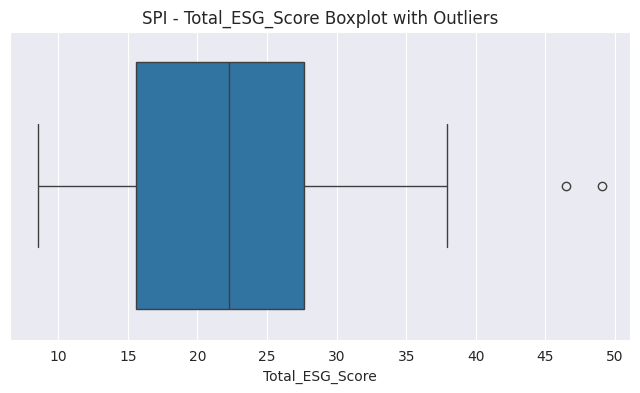

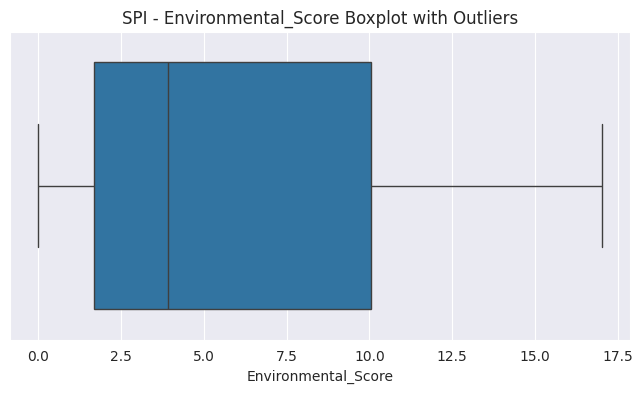

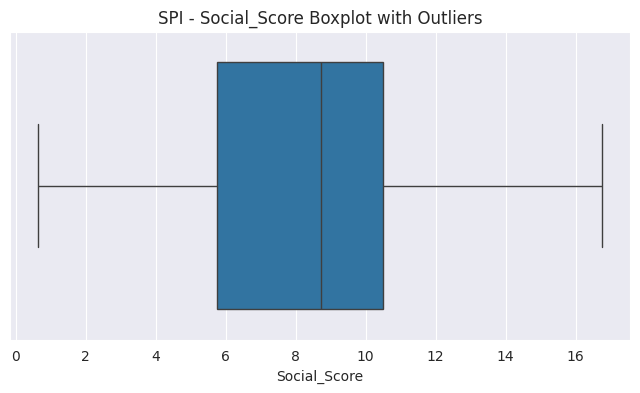

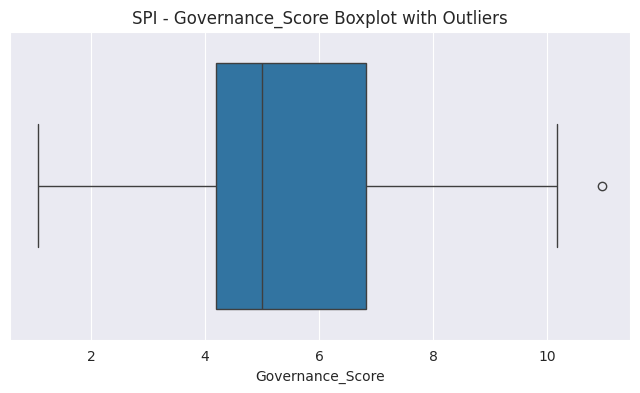

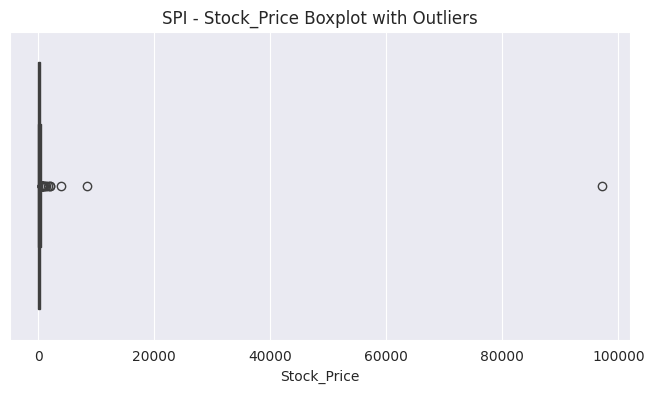

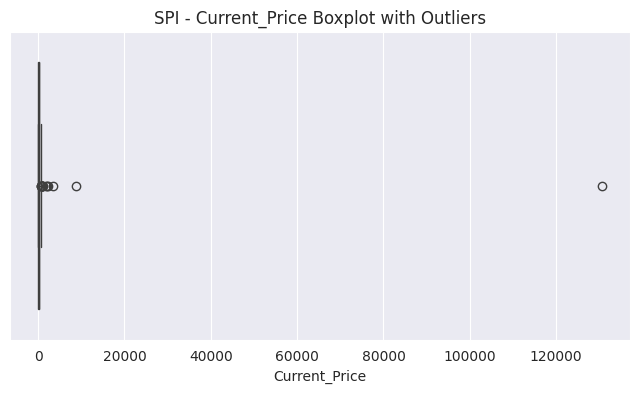

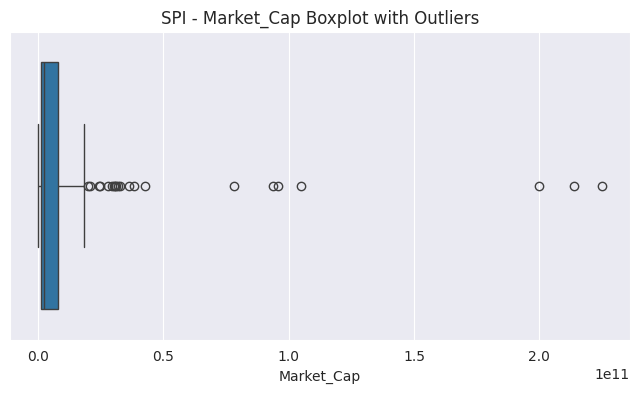

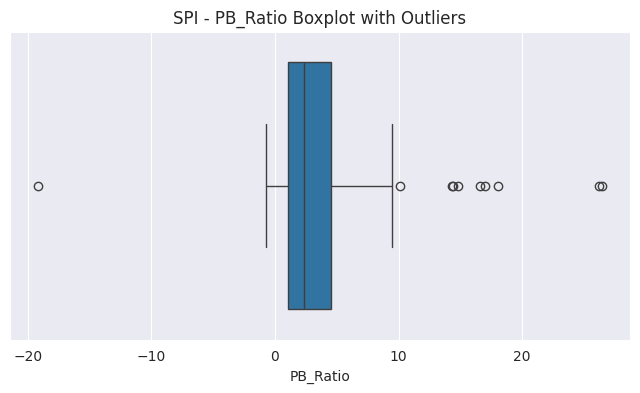

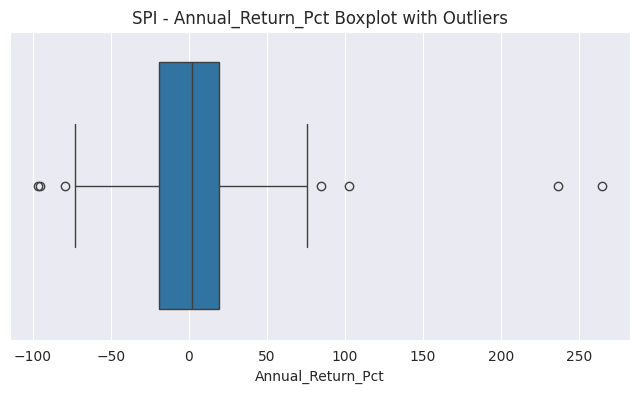

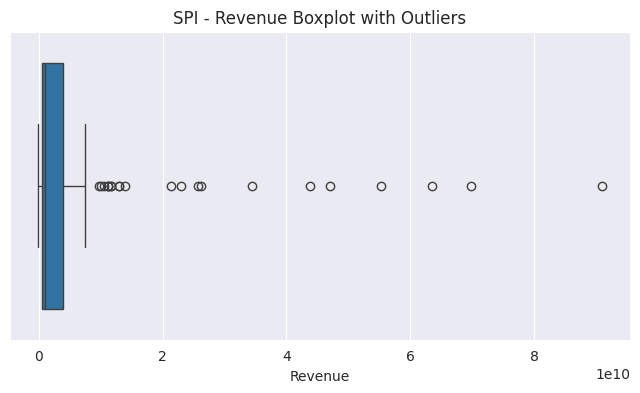

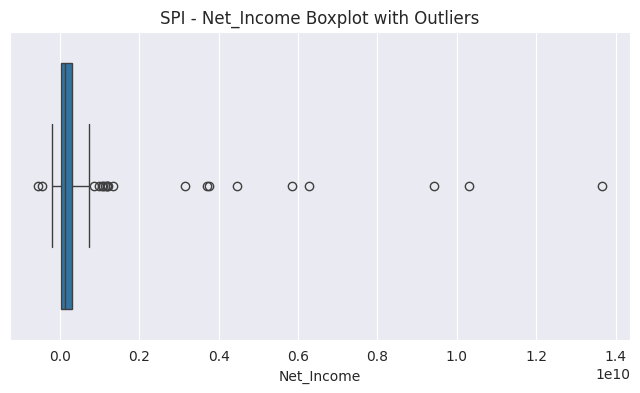

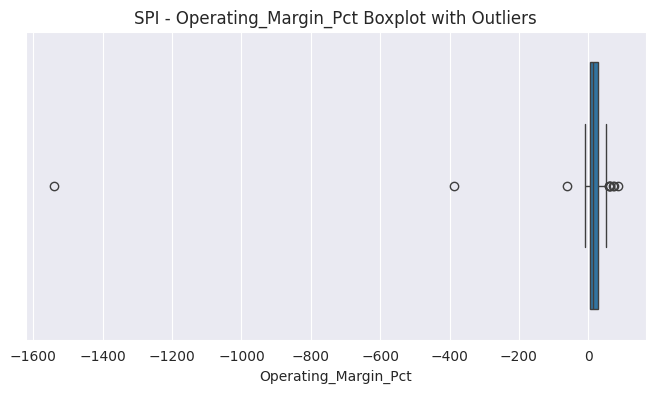

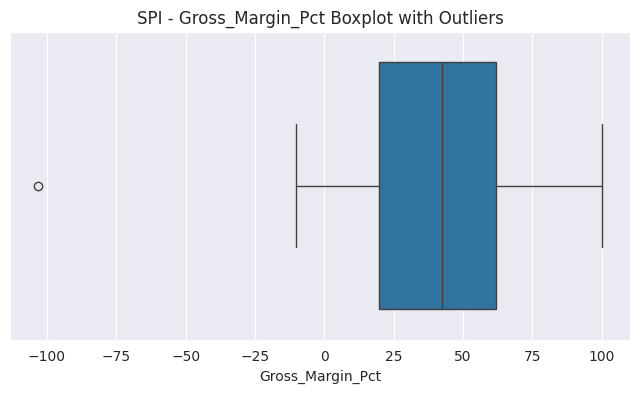

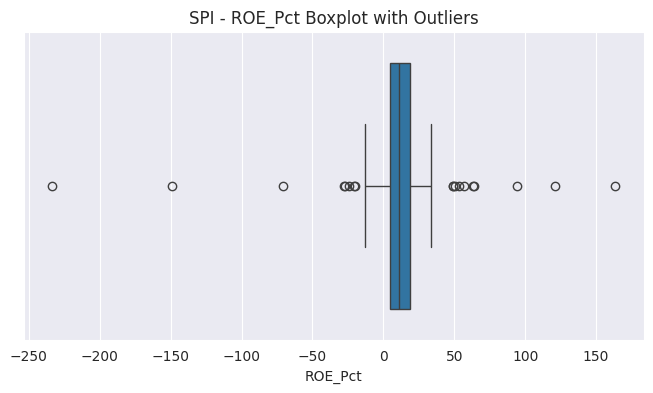

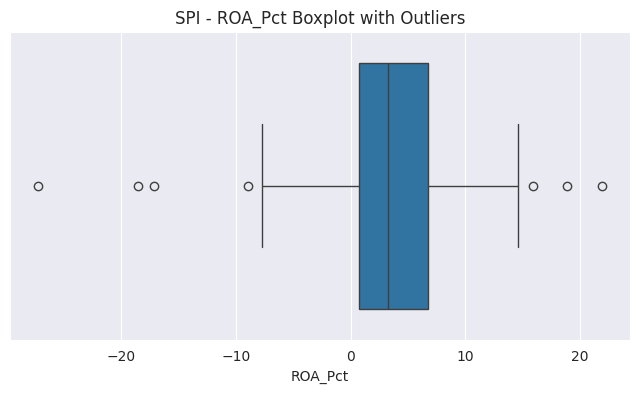

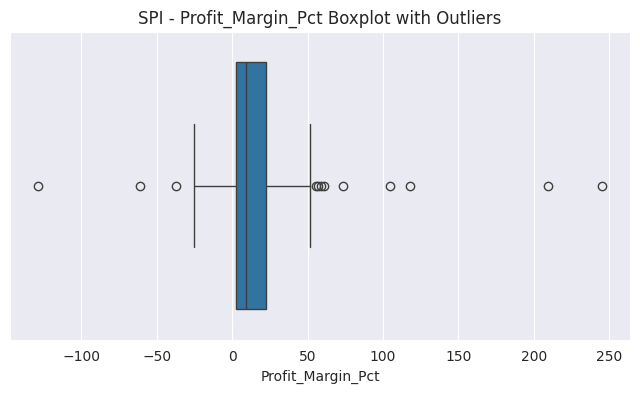

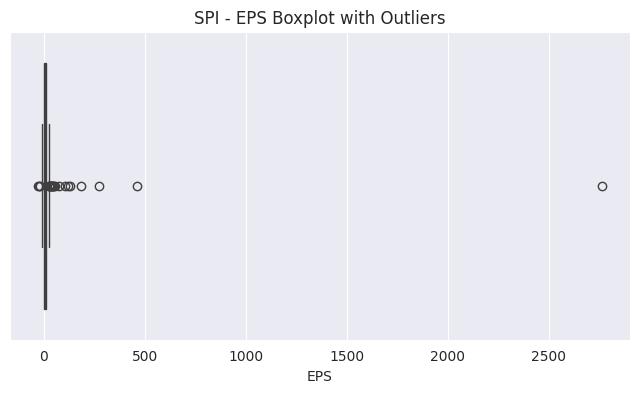

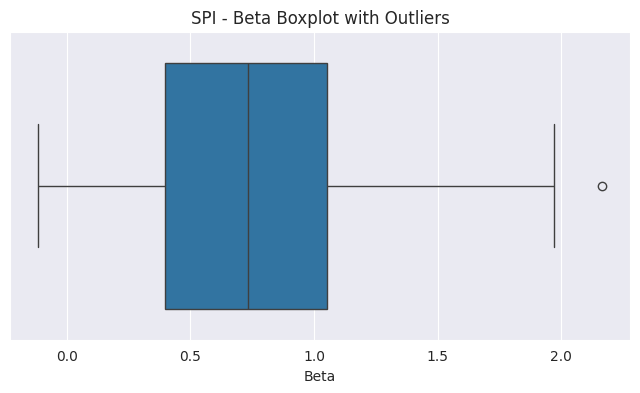

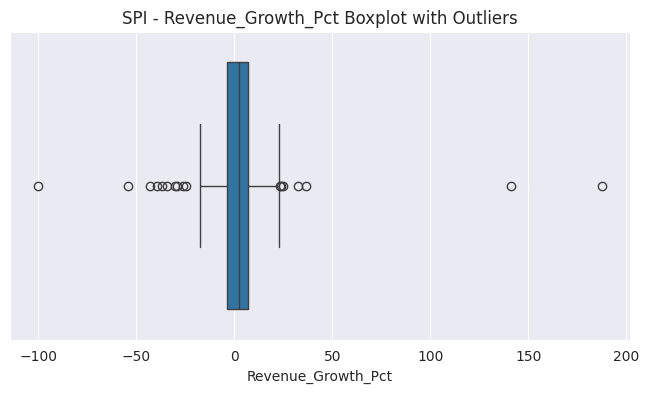

In [39]:
plot_outliers(spi_esg, "SPI")

Boxplots help us visually identify where extreme values occur for specific metrics. Given that our effective ESG sample size is limited, we do not handle extreme values during the data preparation stage, as such extreme values may be legitimate.

TODO: Addressing outliers (keep or remove them) during the analysis and comparison of specific metrics, based on the observed distributions

## 1.7 Enrich Dataset with Additional Information

### 1.7.1 Add Company_Type column for identification before merging

In [40]:
spi_esg['Company_Type'] = "SPI"
sp500_esg['Company_Type'] = "S&P 500"

### 1.7.2 ESG Risk Classification

Yahoo Finance utilizes Sustainalytics’ ESG Risk Ratings, which categorize companies into five levels: Negligible, Low, Medium, High, and Severe. These ratings are visually represented using ESG Globe icons, where **Low numbers indicate a low risk, whereas higher numbers indicate a higher risk**. This classification is widely used in ESG data analysis and investment decision-making.

**ESG Risk Categories at Overall Level** 
(according to [ESG Risk Ratings Methodology](https://www.sustainalytics.com/docs/knowledgehublibraries/default-document-library/sustainalytics_-esg-risk-ratings_-version-3-1_-methodology-abstract_-june-2024.pdf))

A company’s ESG Risk Ratings score on Overall Level is assigned to one of five ESG risk categories in the ESG Risk Ratings:
- Negligible risk (overall unmanaged risk score between 0 and 9.99 points): ESG factors are considered to drive negligible risk to enterprise value.
- Low risk (overall unmanaged risk score between 10 and 19.99 points): ESG factors are considered to drive low risk to enterprise value.
- Medium risk (overall unmanaged risk score between 20 and 29.99 points): ESG factors are considered to drive medium risk to enterprise value.
- High risk (overall unmanaged risk score between 30 and 39.99 points): ESG factors are considered to drive high risk to enterprise value.
- Severe risk (overall unmanaged risk score 40 points and above): ESG factors are considered to drive severe risk to enterprise value.

Note: Because ESG risks materialize at an unknown time in the future and depend on a variety of unpredictable conditions, no predictions on financial or share price impacts, or on the time horizon of such impacts, are intended or implied by these risk categories.

In [41]:
def categorize_esg_risk(score):
    if pd.isna(score):
        return np.nan
    elif score < 10:
        return 'Negligible'
    elif score < 20:
        return 'Low'
    elif score < 30:
        return 'Medium'
    elif score < 40:
        return 'High'
    else:
        return 'Severe'
    
spi_esg['ESG_Risk_Category'] = spi_esg['Total_ESG_Score'].apply(categorize_esg_risk)
spi_esg['ESG_Risk_Category'] = spi_esg['ESG_Risk_Category'].astype('category')

In [42]:
sp500_esg['ESG_Risk_Category'] = sp500_esg['Total_ESG_Score'].apply(categorize_esg_risk)
sp500_esg['ESG_Risk_Category'] = sp500_esg['ESG_Risk_Category'].astype('category')

### 1.7.2 Reorder columns for better readability

In [43]:
cols = list(spi_esg.columns)
cols.remove('Company_Type')
idx = cols.index('Company_Name') + 1
cols.insert(idx, 'Company_Type')
spi_esg = spi_esg[cols]

In [44]:
cols = list(spi_esg.columns)
cols.remove('ESG_Risk_Category')
idx = cols.index('Country') + 1
cols.insert(idx, 'ESG_Risk_Category')
spi_esg = spi_esg[cols]

In [45]:
cols = list(sp500_esg.columns)
cols.remove('Company_Type')
idx = cols.index('Company_Name') + 1
cols.insert(idx, 'Company_Type')

cols.remove('ESG_Risk_Category')
idx = cols.index('Country') + 1
cols.insert(idx, 'ESG_Risk_Category')

sp500_esg = sp500_esg[cols]

## 1.8 Format Dataset for Analysis

### 1.8.1 Remove columns with identical value

In [46]:
esg_clean = pd.concat([spi_esg, sp500_esg], ignore_index=True)

In [47]:
cols_to_drop = [col for col in esg_clean.columns if esg_clean[col].nunique() == 1]

esg_clean = esg_clean.drop(columns=cols_to_drop)

print("Dropped columns:", cols_to_drop)

Dropped columns: ['Data_Date', 'Status']


### 1.8.2 Save Cleaned Datasets

In [48]:
esg_clean.to_csv("Data/cleaned_combined_data.csv", index=False)

# 2 Light Exploratory Data Analysis
- Industry Distribution
- ESG Distribution

## 2.1 Industry Distribution

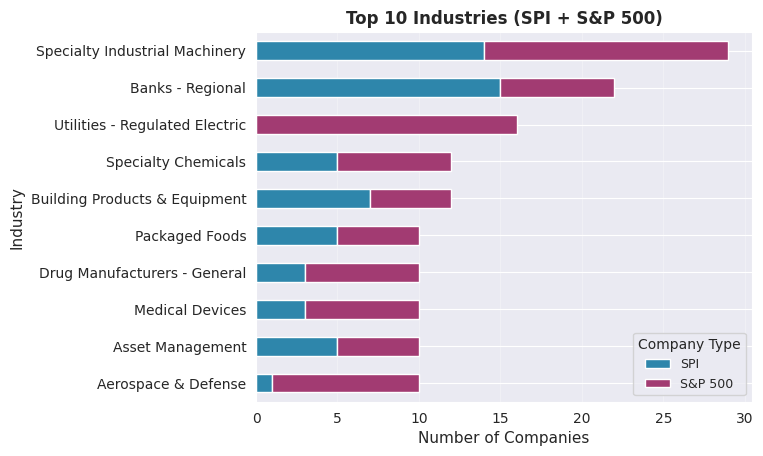

In [49]:
# Top 10 industries by overall company count
top_industries = esg_clean['Industry'].value_counts().head(10).index
top_ind = esg_clean[esg_clean['Industry'].isin(top_industries)]

industry_type_counts = pd.crosstab(top_ind['Industry'], top_ind['Company_Type'])
industry_type_counts = industry_type_counts[['SPI', 'S&P 500']]
industry_type_counts['Total'] = industry_type_counts.sum(axis=1)
industry_type_counts = industry_type_counts.sort_values(by='Total', ascending=True)
industry_type_counts = industry_type_counts.drop(columns='Total')

# figure
industry_type_counts.plot(kind='barh', stacked=True, 
                         color=['#2E86AB', '#A23B72'])

plt.xlabel('Number of Companies', fontsize=11)
plt.ylabel('Industry', fontsize=11)
plt.title('Top 10 Industries (SPI + S&P 500)', fontsize=12, fontweight='bold')
plt.legend(title='Company Type', fontsize=9)
plt.grid(axis='x', alpha=0.3)

plt.show()

**Top 10 Industries according to SPI counts**

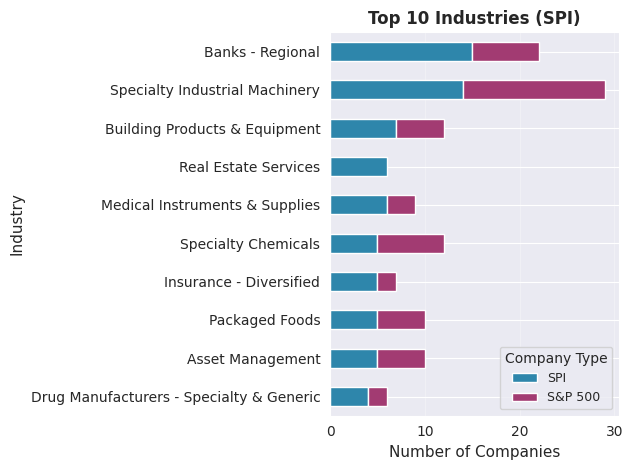

In [50]:
spi_companies = esg_clean[esg_clean['Company_Type'] == 'SPI']
top_spi_industries = spi_companies['Industry'].value_counts().head(10).index

top_spi_ind = esg_clean[esg_clean['Industry'].isin(top_spi_industries)]

industry_spi_counts = pd.crosstab(top_spi_ind['Industry'], top_spi_ind['Company_Type'])
industry_spi_counts = industry_spi_counts[['SPI', 'S&P 500']]
industry_spi_counts = industry_spi_counts.sort_values(by='SPI', ascending=True)

industry_spi_counts.plot(kind='barh', stacked=True, 
                          color=['#2E86AB', '#A23B72'])

plt.xlabel('Number of Companies', fontsize=11)
plt.ylabel('Industry', fontsize=11)
plt.title('Top 10 Industries (SPI)', fontsize=12, fontweight='bold')
plt.legend(title='Company Type', fontsize=9)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

plt.show()

## 2.2 ESG Distribution

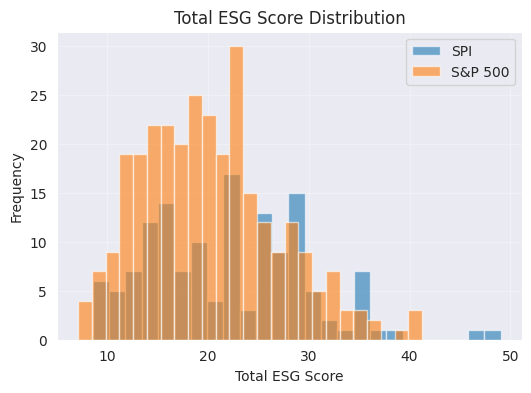

In [51]:
plt.figure(figsize=(6,4))
plt.hist(esg_clean[esg_clean['Company_Type']=='SPI']['Total_ESG_Score'].dropna(), bins=25, alpha=0.6, label='SPI')
plt.hist(esg_clean[esg_clean['Company_Type']=='S&P 500']['Total_ESG_Score'].dropna(), bins=25, alpha=0.6, label='S&P 500')
plt.xlabel('Total ESG Score')
plt.ylabel('Frequency')
plt.title('Total ESG Score Distribution')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/tmp/ipykernel_23354/123533497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=esg_clean, x='Company_Type', y=col, ax=axes[i], palette=['#2E86AB', '#A23B72'])
/tmp/ipykernel_23354/123533497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=esg_clean, x='Company_Type', y=col, ax=axes[i], palette=['#2E86AB', '#A23B72'])
/tmp/ipykernel_23354/123533497.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=esg_clean, x='Company_Type', y=col, ax=axes[i], palette=['#2E86AB', '#A23B72'])
/tmp/ipykernel_23354/123533497.py:8: Future

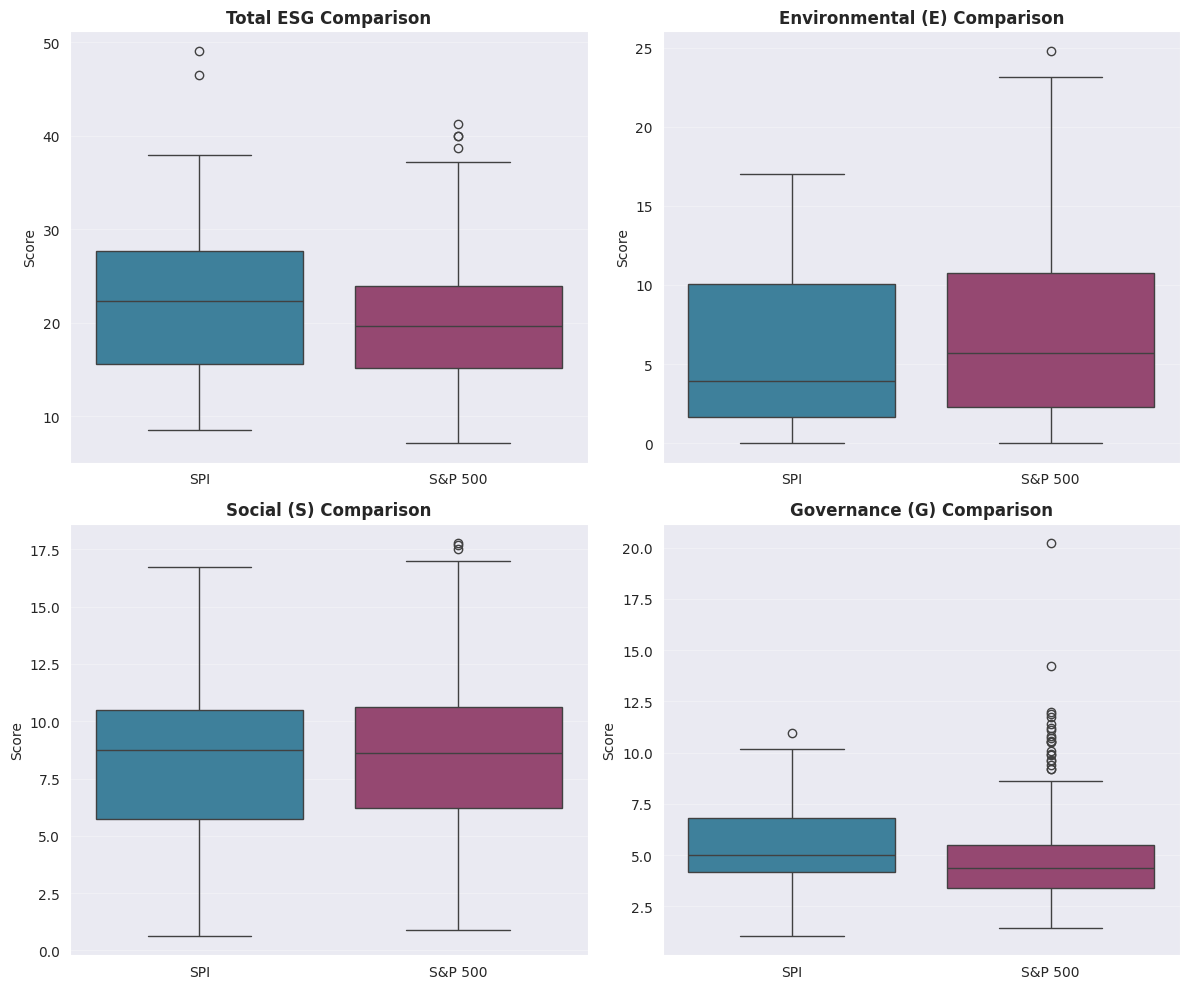

In [52]:
esg_cols = ['Total_ESG_Score', 'Environmental_Score', 'Social_Score', 'Governance_Score']
esg_labels = ['Total ESG', 'Environmental (E)', 'Social (S)', 'Governance (G)']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(esg_cols):
    sns.boxplot(data=esg_clean, x='Company_Type', y=col, ax=axes[i], palette=['#2E86AB', '#A23B72'])
    axes[i].set_title(f'{esg_labels[i]} Comparison', fontsize=12, fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Score')

plt.tight_layout()
plt.show()

<Figure size 700x400 with 0 Axes>

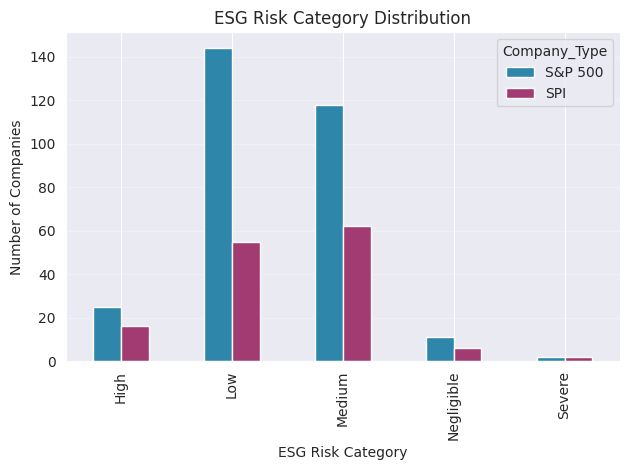

In [53]:
plt.figure(figsize=(7,4))
pd.crosstab(esg_clean['ESG_Risk_Category'], esg_clean['Company_Type']).plot(kind='bar', color=['#2E86AB', '#A23B72'])
plt.xlabel('ESG Risk Category')
plt.ylabel('Number of Companies')
plt.title('ESG Risk Category Distribution')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [54]:
esg_means = esg_clean.groupby('Company_Type')[esg_cols].mean().round(2)
print(esg_means)

              Total_ESG_Score  Environmental_Score  Social_Score  \
Company_Type                                                       
S&P 500                 20.16                 6.87          8.53   
SPI                     22.15                 5.72          8.23   

              Governance_Score  
Company_Type                    
S&P 500                   4.79  
SPI                       5.48  


# 3 Relationship between financial performance and ESG

To answer this question, we want to look into the relationship of several financial performance indicators with the ESG risk score. We first look at the different variables and whey they are relevant or not for further analysis

| **Indicator**            | **Description**                               | **Relevancy for Financial Performance** | **Remarks**                                   |
| ------------------------ | --------------------------------------------- | --------------------------------------- | --------------------------------------------- |
| **Stock_Price**          | Stock price at reference date                 | ❌ Not relevant                           | Not comparable across firms                   |
| **Current_Price**        | Most recent stock price                       | ❌ Not relevant                            | Used to compute returns                       |
| **Market_Cap**           | Market capitalization (price × shares)        | ⚪ Control variable                      | Proxy for firm size                           |
| **log_mc**               | Log-transformed market capitalization         | ⚪ Control variable                      | Used in regressions for size control          |
| **PB_Ratio**             | Price-to-book ratio                           | ✅ Relevant                              | Measures market valuation vs. book value      |
| **Annual_Return_Pct**    | Annualized stock return (%)                   | ✅ Highly relevant                       | Captures market-based performance             |
| **Revenue**              | Total revenues                                | ⚪ Control variable                      | Use only for scaling or ratios                |
| **Net_Income**           | Total net income                              | ⚪ Control variable                      | Absolute measure, not comparable across firms |
| **Operating_Margin_Pct** | Operating income / revenue                    | ✅ Relevant                              | Core profitability indicator                  |
| **Gross_Margin_Pct**     | Gross profit / revenue                        | ✅ Relevant                              | Indicates production efficiency               |
| **ROE_Pct**              | Return on equity                              | ✅ Relevant                              | Measures profitability to shareholders        |
| **ROA_Pct**              | Return on assets                              | ✅ Relevant                              | Measures efficiency of asset use              |
| **Profit_Margin_Pct**    | Net profit / revenue                          | ✅ Relevant                              | Overall profitability indicator               |
| **EPS**                  | Earnings per share                            | ✅ Relevant                              | Reflects profitability per share              |
| **Beta**                 | Systematic market risk                        | ✅ Relevant                              | Indicates volatility relative to market       |
| **Revenue_Growth_Pct**   | Revenue growth rate (%)                       | ✅ Relevant                              | Measures growth and business momentum         |


For the analysis we want to look closer into these models closer

| **Research Focus**     | **Dependent Variable(s)**                                         | **Control Variables**                         | **Independent Variable (ESG)**      |
| ---------------------- | ----------------------------------------------------------------- | --------------------------------------------- | ----------------------------------- |
| **Market performance** | `Annual_Return_Pct`                                               | `log_mc`, `Revenue_Growth_Pct`, `C(Industry)` | `Total_ESG_Score`                   |
| **Profitability**      | `ROE_Pct`, `ROA_Pct`, `Profit_Margin_Pct`, `Operating_Margin_Pct` | `log_mc`, `C(Industry)`                       | `Total_ESG_Score`                   |
| **Valuation**          | `PB_Ratio`, `EPS`                                                 | `log_mc`, `Revenue_Growth_Pct`, `C(Industry)` | `Total_ESG_Score`                   |
| **Risk profile**       | `Beta`                                                            | `log_mc`, `C(Industry)`                       | `Total_ESG_Score`                   |
| **Growth perspective** | `Revenue_Growth_Pct`                                              | `log_mc`, `C(Industry)`                       | `Total_ESG_Score` or ESG sub-scores |


## 3.1 Market performance

### 3.1.1 Data preparation

First prepare the data for the analysis:
1. create a dataset only with the SPI companies
2. log transform market cap to smoothen extreme values
3. choose only those observations with complete data for necessary variables
4. check number of observation per industry to see if we have enough observations

In [59]:
# only SPI dataset from merged data
ch = esg_clean.query("Company_Type == 'SPI'").copy()

# log transformed market cap to smoothen extreme values
ch["log_mc"] = np.log1p(ch["Market_Cap"])

#choose only those entries with complete data in the necessary variables
vars_needed_1 = [
    "Annual_Return_Pct",
    "Total_ESG_Score",
    "log_mc",
    "Revenue_Growth_Pct",
    "Industry"
]

# drop rows with missing values
df_return = ch.dropna(subset=vars_needed_1).copy()
print("N after drop NA:", len(df_return))
df_return[vars_needed_1].describe()


# Check range of ESG and Return values
print("ESG range:", df_return["Total_ESG_Score"].min(), "-", df_return["Total_ESG_Score"].max())
print("Return range:", df_return["Annual_Return_Pct"].min(), "-", df_return["Annual_Return_Pct"].max())

# Industry representation
print("Industries:", df_return["Industry"].nunique())
print(df_return["Industry"].value_counts().head(10))

N after drop NA: 141
ESG range: 8.56 - 49.05
Return range: -96.56 - 264.81
Industries: 51
Industry
Banks - Regional                            15
Specialty Industrial Machinery              14
Building Products & Equipment                7
Medical Instruments & Supplies               6
Real Estate Services                         6
Packaged Foods                               5
Specialty Chemicals                          5
Asset Management                             5
Insurance - Diversified                      5
Drug Manufacturers - Specialty & Generic     4
Name: count, dtype: int64


- We see that the number of companies per industry is maximum 15. Not surprising when considering that the dataset includes only 141 observations. We will take the low number per industry into account for further analysis.
- When looking at the range of ESG rist, we see that we have a broad Streuung, ranging from negligible up to severy risk.
- the annual return range is quite broad with extreme outliers ranging from losses up to -100% or winnings over +250%. In a next step we check the outliers and will exclude them if necessary.

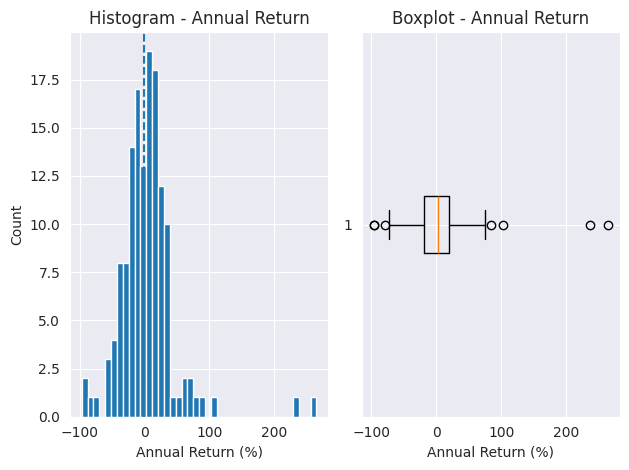

In [61]:
# Histogram + Boxplot
fig, ax = plt.subplots(1, 2)

ax[0].hist(df_return["Annual_Return_Pct"], bins=40)
ax[0].axvline(0, linestyle="--")
ax[0].set_title("Histogram - Annual Return")
ax[0].set_xlabel("Annual Return (%)"); ax[0].set_ylabel("Count")

ax[1].boxplot(df_return["Annual_Return_Pct"].dropna(), vert=False, showfliers=True)
ax[1].set_title("Boxplot - Annual Return")
ax[1].set_xlabel("Annual Return (%)")

plt.tight_layout(); plt.show()


We see that we have 6 outliers according to the boxplot. We want to exclude them from further analysis.

In [62]:
# Compute IQR boundaries
Q1 = df_return["Annual_Return_Pct"].quantile(0.25)
Q3 = df_return["Annual_Return_Pct"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")

df_return_no_outliers = df_return[
    (df_return["Annual_Return_Pct"] >= lower_bound) &
    (df_return["Annual_Return_Pct"] <= upper_bound)
].copy()

print(f"Removed {len(df_return) - len(df_return_no_outliers)} outliers")
print(f"Remaining observations: {len(df_return_no_outliers)}")

Q1: -19.19, Q3: 19.68, IQR: 38.87
Lower bound: -77.50, Upper bound: 77.99
Removed 7 outliers
Remaining observations: 134


### 3.1.2 Analysis

We create a scatterplot to analyse the relationship visually.

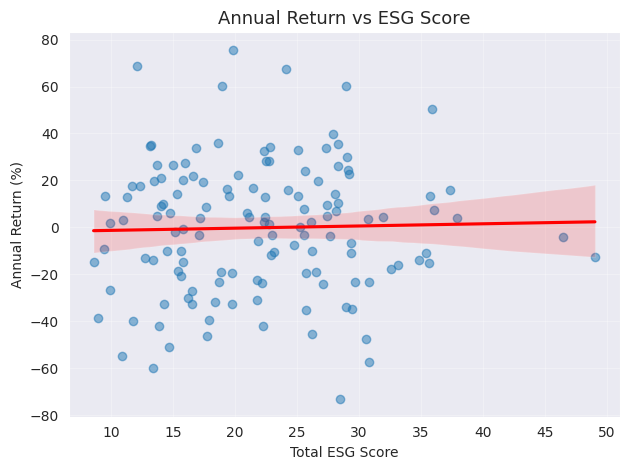

In [74]:
plt.figure()
sns.regplot(
    data=df_return_no_outliers,
    x="Total_ESG_Score",
    y="Annual_Return_Pct",
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"},
    ci=95
)
plt.title("Annual Return vs ESG Score", fontsize=13)
plt.xlabel("Total ESG Score")
plt.ylabel("Annual Return (%)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


The linear fit indicates a very weak (slightly positive) relationship between ESG risk scores and annual returns among SPI companies.
Given that a lower ESG score means lower risk and better ESG performance, this result implies that firms with stronger ESG profiles do not systematically outperform or underperform peers in terms of annual stock returns.
The broad confidence band further suggests that ESG factors alone have limited explanatory power for short-term returns.

Now we run a regression analysis to statistically disentangle the effects and control for several influencing factors, such as:
- **Market capitalization** (log_mc): Larger firms tend to be more diversified, less volatile, and often receive more analyst coverage, which can influence both their ESG performance and financial returns.
- **Revenue growth** (Revenue_Growth_Pct): Rapidly growing firms may experience higher stock returns independent of their ESG profile, so controlling for growth isolates the ESG effect on returns.
- **Industry**: ESG scores and their financial relevance can vary substantially across sectors — for example, environmental factors are more material in manufacturing, while governance plays a stronger role in financial services. Including industry dummies controls for these structural differences.

In [72]:
# How many obs per industry?
counts = df_return_no_outliers["Industry"].value_counts()
keep = counts[counts >= 3].index            # require at least 3 per industry (adjust if you like)

df_fix = df_return_no_outliers.copy()
df_fix["Industry_grp"] = np.where(df_fix["Industry"].isin(keep), df_fix["Industry"], "Other")

# Refit with grouped industry FE
m_ret_clean = smf.ols(
    "Annual_Return_Pct ~ Total_ESG_Score + log_mc + Revenue_Growth_Pct + C(Industry_grp)",
    data=df_fix
).fit(cov_type="HC3") #assumption of heteroscadicity

print(m_ret_clean.summary())



                            OLS Regression Results                            
Dep. Variable:      Annual_Return_Pct   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     7.750
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           3.52e-13
Time:                        21:15:19   Log-Likelihood:                -607.47
No. Observations:                 134   AIC:                             1255.
Df Residuals:                     114   BIC:                             1313.
Df Model:                          19                                         
Covariance Type:                  HC3                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

The adjusted R-squared indicates that the model explains approximately 23% of the variance in annual returns.
Contrary to what we expected based on the visual analysis, the Total ESG Score shows a statistically significant effect (coef = 0.78, p = 0.046). However, the direction of the effect is opposite to our assumption — higher ESG risk (i.e., a higher score) is associated with higher annual returns. The magnitude of this relationship is relatively small, amounting to an increase of about 0.77 percentage points in annual return per ESG-risk point.

The log-transformed market capitalization is highly significant (coef = 6.05, p < 0.001), suggesting that larger companies tend to achieve higher annual returns. In contrast, revenue growth shows no statistically significant relationship with annual returns (coef = 0.03, p = 0.74).

Regarding industry effects, the analysis reveals significantly positive coefficients for:
- Real Estate – Diversified (coef = 37.83, p = 0.005)
- Real Estate Services (coef = 26.98, p = 0.026)
- Banks – Regional (coef = 22.83, p = 0.027)

while Specialty Chemicals is the only sector exhibiting a significant negative effect on annual returns (coef = -25.52, p = 0.014).


now we control for Market cap and industry

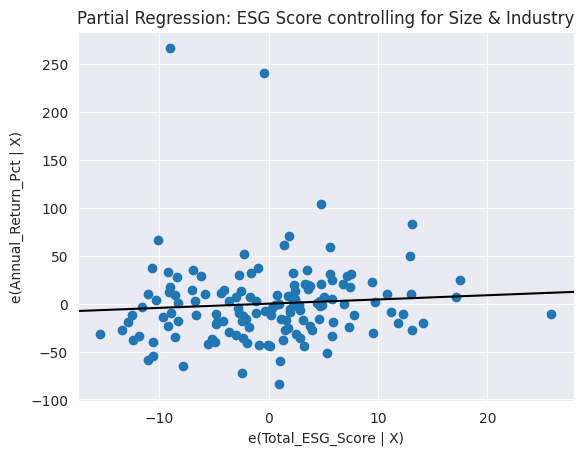

In [73]:
fig = sm.graphics.plot_partregress(
    endog="Annual_Return_Pct",
    exog_i="Total_ESG_Score",
    exog_others=["log_mc", "Revenue_Growth_Pct"],
    data=df_return,
    obs_labels=False
)
plt.title("Partial Regression: ESG Score controlling for Size & Industry")
plt.show()


The partial regression plot visualizes the isolated relationship between the Total ESG Score and the Annual Return, after controlling for firm size (log of market capitalization) and industry effects.

Each point represents the residuals from two regressions:

- On the x-axis: the portion of ESG Score not explained by size and industry.
- On the y-axis: the portion of Annual Return not explained by size and industry.

The fitted line shows the remaining linear association between these residuals. The slightly positive slope indicates that, when holding firm size and industry constant, companies with higher ESG risk (higher ESG scores) tend to exhibit slightly higher annual returns.

However, the relationship is weak, as shown by the flat slope and the high dispersion of points around the regression line. This suggests that ESG risk alone explains little of the remaining variation in returns once structural factors like size and industry are accounted for.

In summary, the partial regression confirms the main regression result: ESG risk has a small but statistically significant positive association with returns, implying that higher-risk firms might be compensated by slightly higher financial performance — though the economic relevance of this effect is limited.

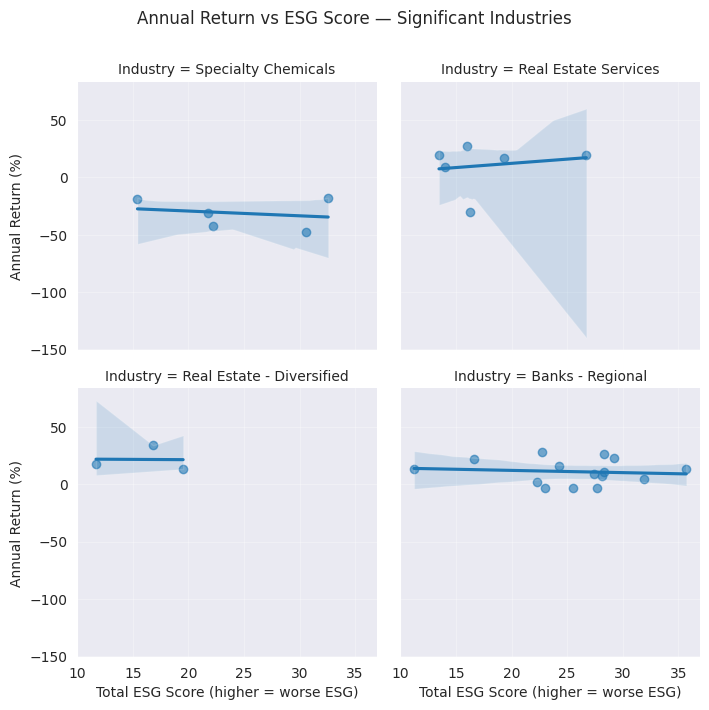

In [77]:
# pick the significant industries (from your regression)
sig_inds = [
    "Real Estate - Diversified",
    "Real Estate Services",
    "Banks - Regional",
    "Specialty Chemicals"
]

# choose which column to use (Industry_grp if you grouped, else Industry)
ind_col = "Industry_grp" if "Industry_grp" in df_return_no_outliers.columns else "Industry"

use_col = "Industry_grp" if "Industry_grp" in df_return_no_outliers.columns else "Industry"
plot_set = df_return_no_outliers[df_return_no_outliers[use_col].isin(sig_inds)].copy()

g = sns.lmplot(
    data=plot_set,
    x="Total_ESG_Score", y="Annual_Return_Pct",
    col=use_col, col_wrap=2, height=3.6,
    scatter_kws={"alpha":0.6}
)
g.set_axis_labels("Total ESG Score (higher = worse ESG)", "Annual Return (%)")
for ax in g.axes.flat:
    ax.grid(alpha=0.3)
plt.subplots_adjust(top=0.88)
g.fig.suptitle("Annual Return vs ESG Score — Significant Industries")
plt.show()


To further explore whether the relationship between ESG performance and annual financial returns varies across industries, we visualized the associations for the sectors that showed significant effects in the regression model: Specialty Chemicals, Real Estate – Diversified, Real Estate Services, and Banks – Regional.

Across these industries, the patterns differ in both direction and magnitude. In Specialty Chemicals and Regional Banks, we observe a slightly negative relationship, suggesting that companies with better ESG scores (lower ESG risk) tend to achieve higher annual returns. Conversely, in Real Estate Services, the relationship appears positive, implying that firms with higher ESG risk might exhibit somewhat higher returns, although this effect is characterized by wide confidence intervals due to limited sample size. For Real Estate – Diversified, the slope is nearly flat, indicating no meaningful association between ESG performance and annual return.

Overall, these results suggest that the financial relevance of ESG factors is industry-dependent, with some sectors potentially rewarding better ESG management, while in others, the relationship appears weak or even reversed. However, given the small number of observations in several industries, these findings should be interpreted with caution and considered indicative rather than conclusive.